## Load Data

In [ ]:
import tensorflow as tf

def load_mnist():
  mnist = tf.keras.datasets.mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  return x_train, y_train, x_test, y_test

X_train, y_train, X_test, y_test = load_mnist()

## Analyze Data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

## Scale Data

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
print(f'Input shape: {X_train[0].shape}')

Input shape: (28, 28)


## Build Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2936 - accuracy: 0.9143 - val_loss: 0.1490 - val_accuracy: 0.9554
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1419 - accuracy: 0.9577 - val_loss: 0.1013 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1045 - accuracy: 0.9686 - val_loss: 0.0836 - val_accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0848 - accuracy: 0.9738 - val_loss: 0.0786 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0741 - accuracy: 0.9765 - val_loss: 0.0737 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0642 - accuracy: 0.9794 - val_loss: 0.0713 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0576 - accuracy: 0.9813 - val_loss: 0.0699 - val_accuracy

## Analyze Model

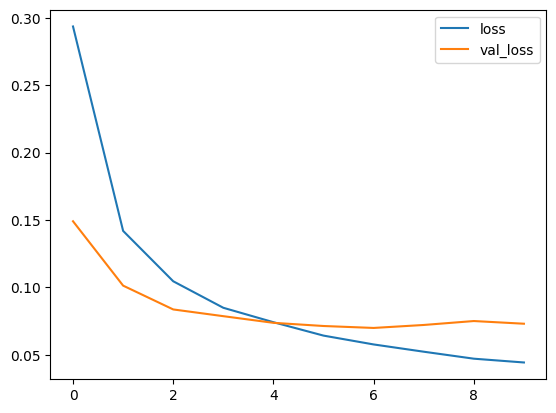

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

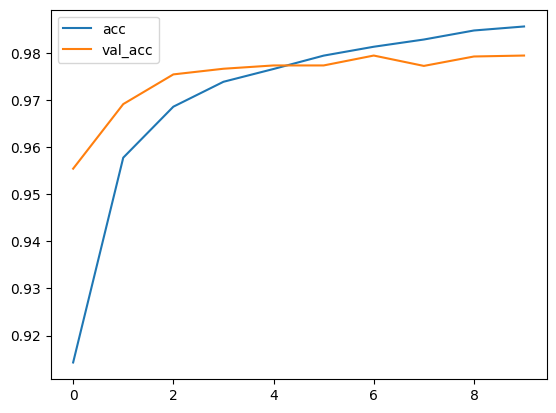

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 3s 9ms/step - loss: 0.0730 - accuracy: 0.9794
[0.07298940420150757, 0.9793999791145325]


313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[ 975    0    1    0    0    1    1    1    1    0]
 [   0 1120    3    0    0    1    2    2    7    0]
 [   6    2 1004    2    2    0    2    7    7    0]
 [   1    0    2  990    0    4    0    8    4    1]
 [   1    0    3    0  964    0    4    2    1    7]
 [   3    0    0    5    0  874    5    1    2    2]
 [   6    2    1    1    3    3  941    0    1    0]
 [   2    3   12    1    1    0    0 1002    2    5]
 [   6    0    1    5    2    2    3    4  948    3]
 [   2    3    0    3   10    7    0    7    1  976]]


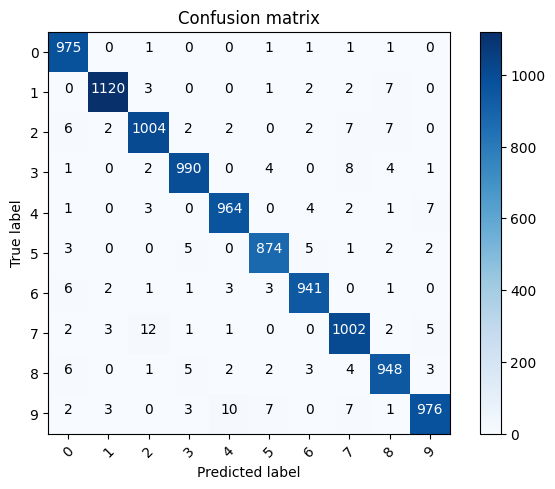

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

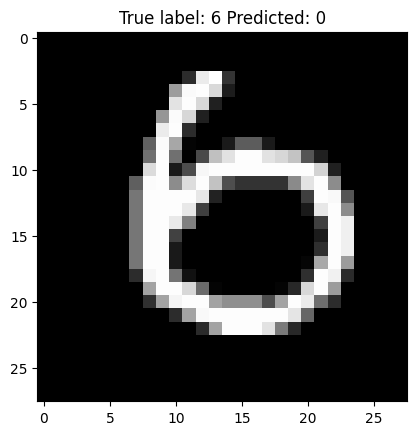

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));